In [1]:
#Import necessary modules for the script
import os
import sys
import h5py
import time
import random
import new_cmaps
%run LoadNotebook
%matplotlib inline
import numpy as np
import DataProcess as R
import scipy.special as sp
from scipy.special import kn
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.integrate as integrate
from matplotlib.colors import LogNorm
plt.style.use('apw-notebook.mplstyle')

importing Jupyter notebook from DataProcess.ipynb


In [2]:
# Distribution from simualations
path = '/tigress/ruix/new_simu/1dang70mass100/output/'
#path = '/tigress/ruix/simu/betainj025/output/'
os.chdir(path)
R.cal_param('MachUp')

array([ 2.85276706])

In [3]:
# Distribution from simualations
path = '/tigress/ruix/new_simu/1dang70mass100_up/output/'
#path = '/tigress/ruix/simu/betainj025/output/'
os.chdir(path)

In [4]:
def Phase_Plot(ind,sp,val,xbins=200):
    pval = R.readprtl(val+sp,ind)
    xval = R.readprtl('x'+sp,ind)/R.readparam('c_omp')
    #mycmap = new_cmaps.cmaps['viridis']
    zval = R.readflds('bx',ind)

    xmax = zval.shape[1]/R.readparam('c_omp')*R.readparam('istep')
    xmin = 0
   
    hist2d = np.histogram2d(pval,xval,bins = [xbins,xbins])
    cax = plt.imshow(hist2d[0],cmap=new_cmaps.cmaps['viridis'],norm=LogNorm(),
        origin='lower',aspect='auto',interpolation='hermite',
        extent=[0,xmax,min(pval),max(pval)])

    plt.xlabel(r'$x[c/\omega_{pe}]$')
    plt.ylabel(r'$\gamma\beta$')
    #plt.xticks(np.linspace(xmin,xmax,5))
    plt.xlim([xmin,xmax])
    #plt.ylim([-0.4,0.2])
    plt.colorbar()

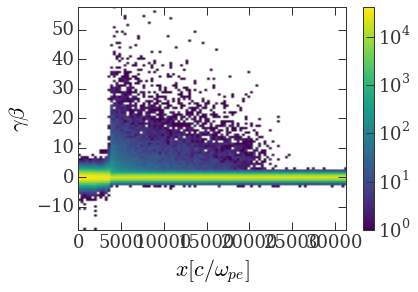

In [11]:
ind = 100
Phase_Plot(ind,'e','v',xbins=100)

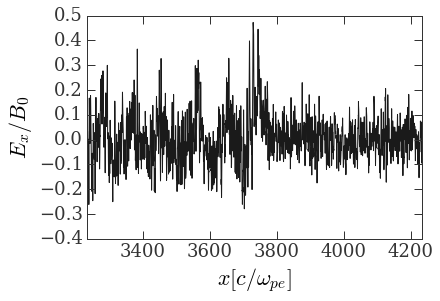

In [12]:
param ='ex'
pval  = R.readflds(param,ind)
bx    = R.readflds('bx',ind)
b0    = R.readparam('b0',ind)
ishf,xshf,shs = R.shfind(ind)
xval  = np.linspace(0,pval.shape[1]/R.readparam('c_omp')*R.readparam('istep'),pval.shape[1])
#ytmp  = np.mean(pval, axis=0)/b0
ytmp  = pval[pval.shape[0]/2,:]/b0
plt.plot(xval,ytmp, '-')
plt.xlim([xshf-500,xshf+500])
plt.xlabel('$x[c/\omega_{pe}]$')
plt.ylabel('$E_x/B_0$')

/usr/licensed/anaconda/4.1.1/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide


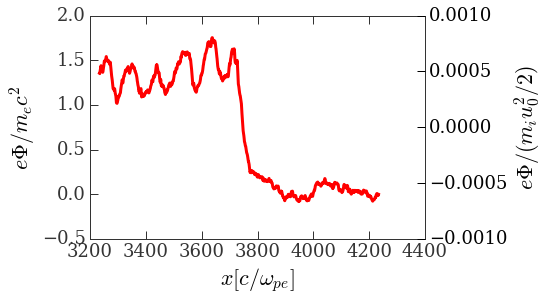

In [13]:
from scipy import integrate
in_range = (xval<xshf+500) & (xval>xshf-500)

ytmp1 = ytmp[in_range]
xtmp1 = xval[in_range]
y_int = integrate.cumtrapz(ytmp1[::-1], xtmp1[::-1], initial=0)


fig, ax1 = plt.subplots()
ax1.plot(xtmp1[::-1], -y_int*R.cal_param('Va')*np.sqrt(R.readparam('mi')/R.readparam('me')), 'r-',lw=3)
ax1.set_xlabel('$x[c/\omega_{pe}]$')
ax1.set_ylabel('$e\Phi/m_e c^2$')

ax2 = ax1.twinx()
mn, mx = ax1.get_ylim()
unit_conv = R.readparam('me')/R.readparam('mi')/R.cal_param('Vinf')**2*2.
ax2.set_ylim(mn*unit_conv, mx*unit_conv)
ax2.set_ylabel('$e\Phi/(m_i u_0^2/2)$')
ax2.tick_params('y', colors='k')